<a href="https://colab.research.google.com/github/ArpitAwasthi2411/Machine-Learning/blob/main/MachineLearningLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(23010503012)

23010503012


## Practical 1 ##
Python program to import and export data using Panda's Library Function

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stock_data.csv",na_values=['n.a.','not available'])

In [ ]:
df.shape

(5, 5)

In [ ]:
d = df.fillna('-')
print(d)

  tickers    eps  revenue   price         people
0   GOOGL  27.82       87   845.0     larry page
1     WMT   4.61      484    65.0              -
2    MSFT   -1.0       85    64.0     bill gates
3    RIL       -       50  1023.0  mukesh ambani
4    TATA    5.6       -1       -     ratan tata


In [ ]:
f = d.to_csv("/content/drive/MyDrive/cleaned_stock_data.csv")
print(f)

None


In [ ]:
d.describe()

,revenue
count,5.000000
mean,141.000000
std,195.029485
min,-1.000000
25%,50.000000
50%,85.000000
75%,87.000000
max,484.000000


In [ ]:
d.head(2)


,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,-


In [ ]:
d.tail(3)

,tickers,eps,revenue,price,people
2,MSFT,-1.0,85,64.0,bill gates
3,RIL,-,50,1023.0,mukesh ambani
4,TATA,5.6,-1,-,ratan tata


In [ ]:
d[0:3]

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,-
2,MSFT,-1.0,85,64.0,bill gates


In [ ]:
d[0:3][['eps','revenue']]

,eps,revenue
0,27.82,87
1,4.61,484
2,-1.0,85


In [ ]:
total_revenue = d['revenue'].sum()
print(total_revenue)

705


In [ ]:
print(d)

  tickers    eps  revenue   price         people
0   GOOGL  27.82       87   845.0     larry page
1     WMT   4.61      484    65.0              -
2    MSFT   -1.0       85    64.0     bill gates
3    RIL       -       50  1023.0  mukesh ambani
4    TATA    5.6       -1       -     ratan tata


In [ ]:
d.iloc[:,0:3]

,tickers,eps,revenue
0,GOOGL,27.82,87
1,WMT,4.61,484
2,MSFT,-1.0,85
3,RIL,-,50
4,TATA,5.6,-1


## Practical 2 ##
Various Data Preprocessing Techniques for a given dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
sns.set(style="whitegrid")


In [ ]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.Series(iris.target, name="target")

In [ ]:
x.iloc[0:5,0] = np.nan

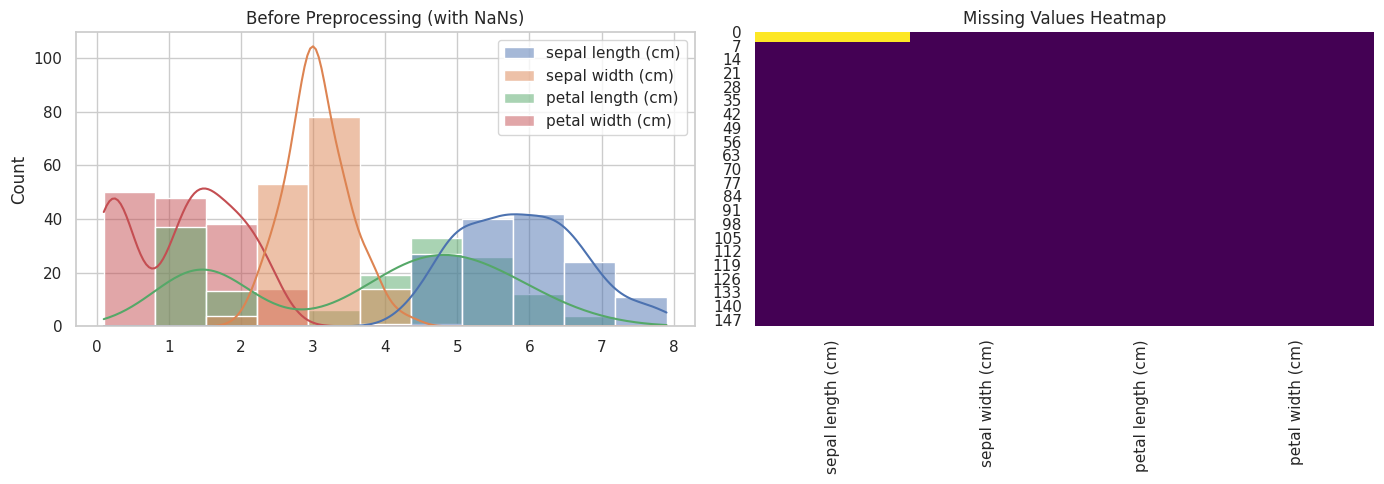

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=x, kde=True, legend=True)
plt.title("Before Preprocessing (with NaNs)")
plt.subplot(1, 2, 2)
sns.heatmap(x.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

In [ ]:
scaler_std = StandardScaler()
X_scaled_std = pd.DataFrame(scaler_std.fit_transform(X_imputed), columns=x.columns)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_imputed), columns=x.columns)


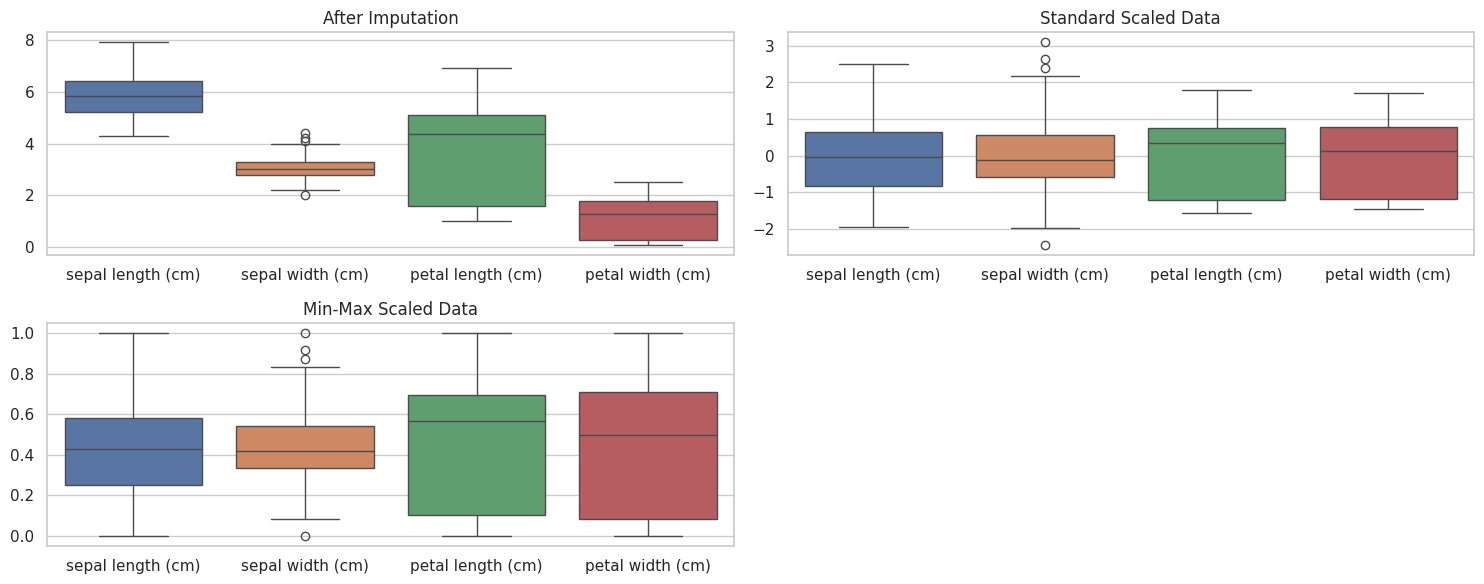

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=X_imputed)
plt.title("After Imputation")
plt.subplot(2, 2, 2)
sns.boxplot(data=X_scaled_std)
plt.title("Standard Scaled Data")
plt.subplot(2, 2, 3)
sns.boxplot(data=X_scaled_minmax)
plt.title("Min-Max Scaled Data")
plt.tight_layout()
plt.show()

In [ ]:
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled_std, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = [x.columns[i] for i in selected_features]